In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import genextreme
import joblib
#From pdf page 3.3.4.1. We generate data from a Weibull distribution
# location parameter (loc) = b
# scale parameter (scale) = a
# shape parameter (c) = k

In [ ]:
######### taken from config.py #########
k_set = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
a_set = [27, 27.555555555555557, 30.333333333333332, 35.333333333333336, 40.333333333333336, 45.333333333333336] 
b_set = [10, 13.88888888888889, 17.77777777777778, 21.666666666666668, 25.555555555555557, 28.333333333333332]


In [103]:
k_set = [0.1, 0.5, 0.8, 1.2]
a_set = [27, 28.579, 35.421, 45.421] 
b_set = [10, 15.789, 21.579, 28.421]

In [105]:
num_rows = 1500
data = {}
for i, (k, a, b) in enumerate(zip(k_set, a_set, b_set), start=1):
   generated_data = genextreme.rvs(c=k, loc=b, scale=a, size=num_rows)
   data[f'set{i}'] = generated_data
data['set0'] = 0
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'preparation'
df.to_csv(FOLDER+ '/' + 'gev_config3.csv', index=False)

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm


count    1000.000000
mean       30.986406
std        10.442102
min         3.117514
25%        23.769199
50%        29.852501
75%        38.517641
max        65.100388
Name: set1, dtype: float64


<Axes: ylabel='Frequency'>

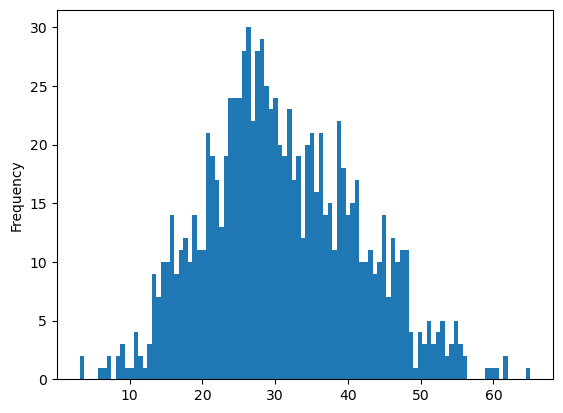

In [5]:
#print the distribution of trhe first set
print(df['set1'].describe())
#print the plot
df['set1'].plot(kind='hist', bins=100)


In [ ]:
ing_samples = ing_kde.sample(1000)
nvm_samples = nvm_kde.sample(1000)

# Plot the distributions of the samples
plt.figure(figsize=(12, 6))

# Plot for ing_kde samples
plt.subplot(1, 2, 1)
plt.hist(ing_samples, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of ing_kde Samples')
plt.xlabel('Value')
plt.ylabel('Density')

# Plot for nvm_kde samples
plt.subplot(1, 2, 2)
plt.hist(nvm_samples, bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution of nvm_kde Samples')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [13]:
paths = ['kde_model_3d.joblib', 'kde_model_nvm.joblib']
ing_kde = joblib.load(FOLDER + '/' + paths[0])
nvm_kde = joblib.load(FOLDER + '/' + paths[1])

/Users/matteovalle/anaconda3/envs/Norma/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KernelDensity from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [98]:
#from model.py line 169 SHOULD OUTPUT 3 VALUES
# income, job_since, ratio cap respectively
#income, seniority, r_cap = ing_kde.sample(1)[0]
ing_kde.sample(1)

array([[873.211535  , 177.18479122]])

In [71]:
nvm_kde.sample(1)[0]

array([334.63029264, 537.98975269])

In [22]:
data = ing_kde.dataset

AttributeError: 'KernelDensity' object has no attribute 'dataset'

In [24]:
samples = nvm_kde.sample(5)
print(samples)

[[ 140.59767371  284.55568533]
 [  97.78689136  297.25942908]
 [  84.70421456  254.21122586]
 [ 207.76206329  454.2137822 ]
 [ 259.74047503 1039.42519681]]


In [34]:
print(ing_kde.sample(1)[0])

[3854.99784154  358.8207936 ]


In [93]:
from scipy.stats import burr
income = burr.rvs(c=3.30, d=0.45, loc=-12.76, scale=3101.46)
income

1351.635978371731